In [1]:
import pandas as pd
import numpy as np
import tarfile
import io
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
file_list = []
for logN in range(1):
    file_list.append('../data/raw/training_set/log_'+str(logN)+'_20180917_000000000000.csv')

file_list

['../data/raw/training_set/log_0_20180917_000000000000.csv']

In [3]:
log_df = pd.read_csv(file_list[0])
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122466 entries, 0 to 3122465
Data columns (total 21 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   session_id                       object
 1   session_position                 int64 
 2   session_length                   int64 
 3   track_id_clean                   object
 4   skip_1                           bool  
 5   skip_2                           bool  
 6   skip_3                           bool  
 7   not_skipped                      bool  
 8   context_switch                   int64 
 9   no_pause_before_play             int64 
 10  short_pause_before_play          int64 
 11  long_pause_before_play           int64 
 12  hist_user_behavior_n_seekfwd     int64 
 13  hist_user_behavior_n_seekback    int64 
 14  hist_user_behavior_is_shuffle    bool  
 15  hour_of_day                      int64 
 16  date                             object
 17  premium                    

In [4]:
log_df.head().T

,0,1,2,3,4
session_id,64_00015322-1e17-40d9-865d-4887eea2b659,64_00015322-1e17-40d9-865d-4887eea2b659,64_00015322-1e17-40d9-865d-4887eea2b659,64_00015322-1e17-40d9-865d-4887eea2b659,64_00015322-1e17-40d9-865d-4887eea2b659
session_position,1,2,3,4,5
session_length,19,19,19,19,19
track_id_clean,t_e587194e-c1a1-4177-b089-e4c37dd7a24d,t_039553af-ae1b-45ce-9efa-e27ad7db88a6,t_fb5ede48-6706-429b-abf8-243559f3f94b,t_e6cf4873-d8bb-4894-91cd-1ef4f18f5908,t_b74ec0be-4204-43b1-ab03-a42b2744c3ad
skip_1,False,False,False,False,True
skip_2,False,False,False,False,True
skip_3,False,True,False,False,True
not_skipped,True,False,True,True,False
context_switch,0,0,0,0,0
no_pause_before_play,0,0,1,1,0


In [5]:
print('skipping rate:',log_df['skip_2'].mean())

skipping rate: 0.5040990038002016


/Users/andrewchang/opt/anaconda3/envs/Springboard_new/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


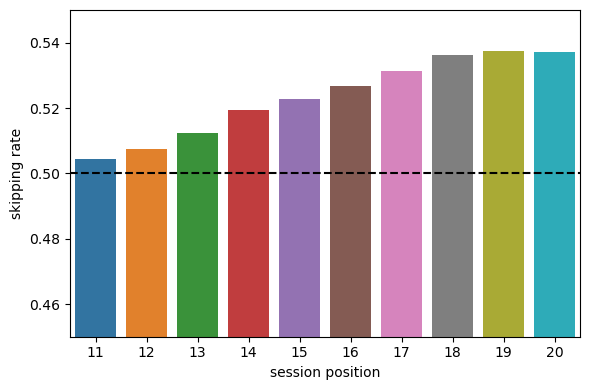

In [6]:
skip_by_position = pd.DataFrame(log_df.groupby(['session_position'])['skip_2'].mean())
fig, ax = plt.subplots(figsize=(6,4)) 

graph = sns.barplot(skip_by_position[10:].T, ax=ax)
ax.set_ylabel('skipping rate')
ax.set_xlabel('session position')
graph.axhline(0.5, linestyle = '--', c = 'k')
plt.ylim(0.45,0.55)
plt.tight_layout()
plt.show()


/var/folders/g1/pt2wv7fn1txcdflc2vs67qsr0000gn/T/ipykernel_26967/86954551.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  log_df_s_mean = log_df.groupby(['session_id']).mean()


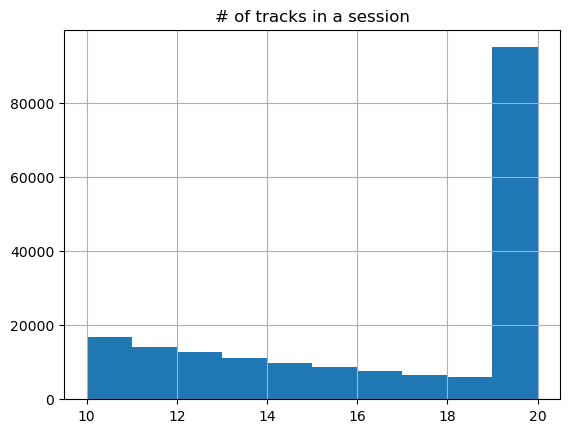

In [7]:
log_df_s_mean = log_df.groupby(['session_id']).mean()
log_df_s_mean['session_length'].hist()
plt.title('# of tracks in a session')
plt.show()

In [8]:
print('% of sessions having 20 tracks:',(log_df_s_mean['session_length']==20).mean())

% of sessions having 20 tracks: 0.4764248883507777


# Track data

In [9]:
tar = tarfile.open('../data/raw/20181120_track_features.tar.gz', 'r:gz')
csv_files = tar.getnames()

tf_df_list = []

for csv_file in [csv_files[2], csv_files[4]]:
    csv_contents = tar.extractfile(csv_file).read()
    tf_df_list.append(pd.read_csv(io.BytesIO(csv_contents), encoding='utf8'))

tf_df = pd.concat(tf_df_list, ignore_index=True)

In [10]:
tf_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
track_id,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,t_36b9ad02-095a-443d-a697-6c7285d9410a,t_cbf7084a-0ab7-40b2-8e47-a010580e8d15,t_2ee16606-ba70-419f-a437-7c6ee2b8ec26,t_3e80fb67-dc0b-4a97-aff8-88d82f452f9d,t_f9b9a072-8dae-4816-bfd6-d91fc75a5744,t_d076e5fa-174c-4614-a1b8-371bd0ea3343
duration,326.013336,147.813324,110.400002,237.653336,174.600006,164.826675,262.706665,244.666672,180.133331,141.226669
release_year,1971,1963,1974,1988,1987,1956,1963,1988,1989,1966
us_popularity_estimate,99.582885,97.272035,99.620384,96.79683,97.905891,92.592429,99.183088,97.830526,97.720734,90.320035
acousticness,0.716209,0.83946,0.054673,0.042606,0.249982,0.734342,0.79803,0.513671,0.002047,0.988567
beat_strength,0.366495,0.362212,0.495002,0.389634,0.51364,0.165064,0.414411,0.658134,0.425469,0.388165
bounciness,0.332605,0.389829,0.589378,0.359044,0.485435,0.140488,0.440939,0.653404,0.486543,0.380072
danceability,0.439835,0.50758,0.552311,0.585673,0.635095,0.199769,0.383561,0.734945,0.65454,0.49712
dyn_range_mean,5.805774,6.845427,9.361949,6.068578,7.198735,4.153819,7.293006,9.109443,7.990334,6.464887
energy,0.238847,0.420476,0.842938,0.665398,0.408715,0.379919,0.422262,0.701644,0.625231,0.200862


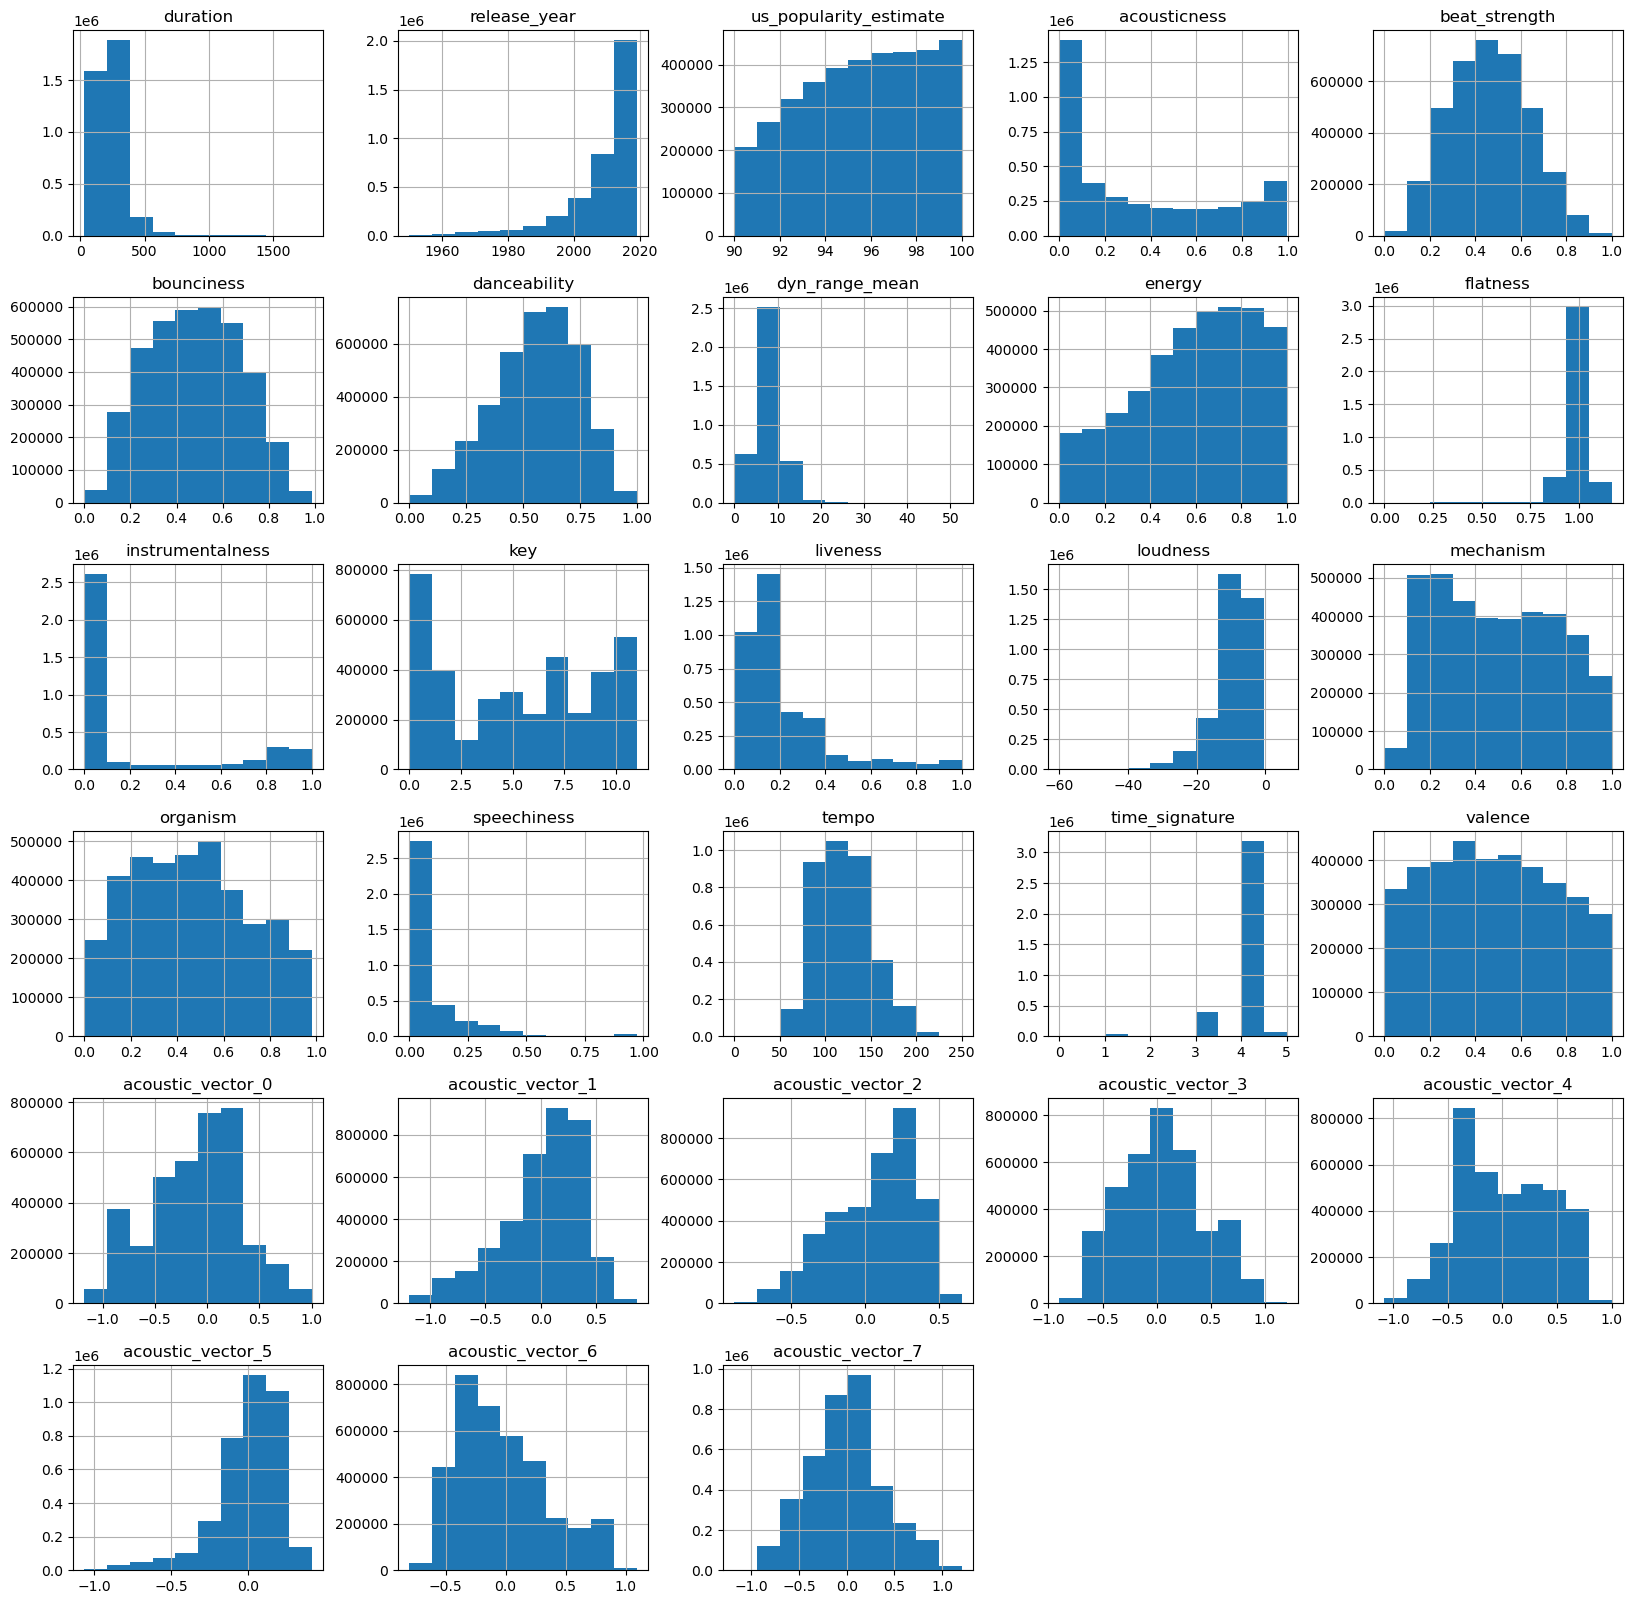

In [11]:
tf_hist = tf_df.hist(figsize = (20,20))

/var/folders/g1/pt2wv7fn1txcdflc2vs67qsr0000gn/T/ipykernel_26967/467344416.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( tf_df.corr(method='pearson'), linewidth = 0.5 , cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", ax = ax)


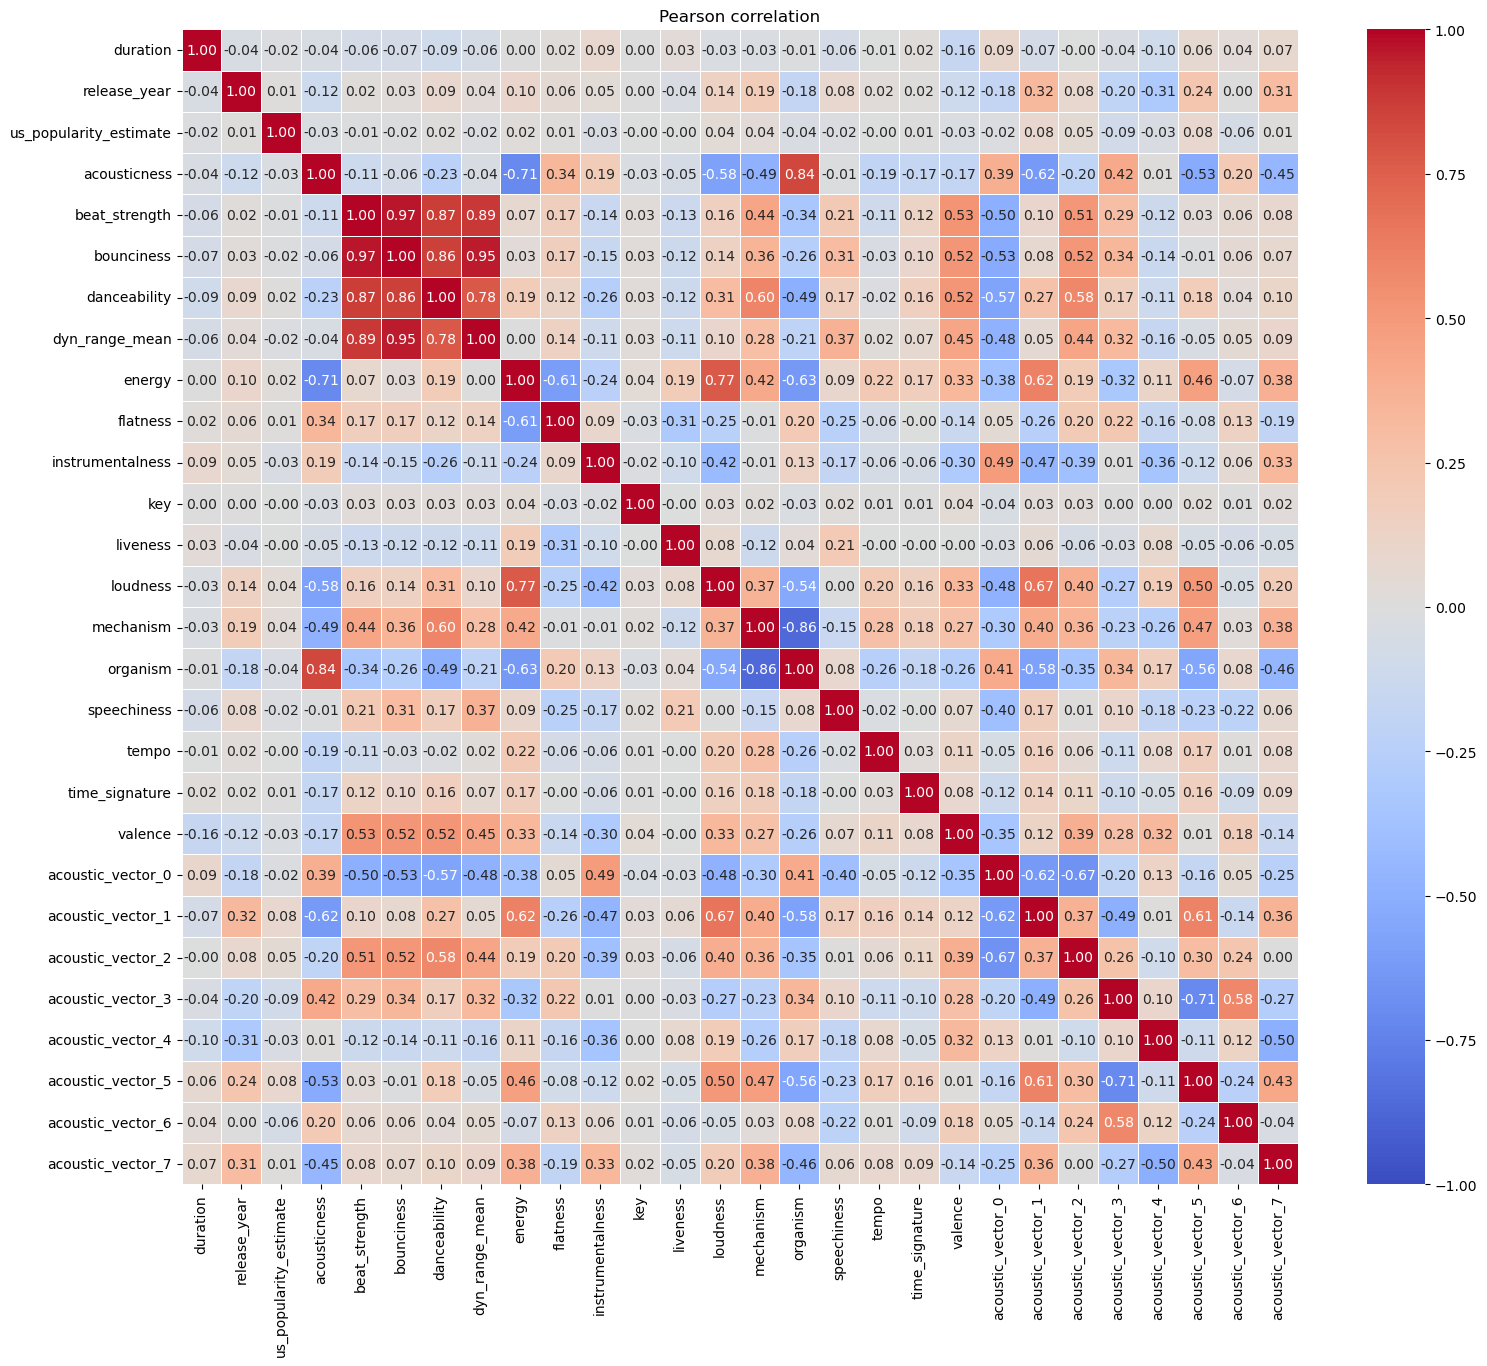

In [12]:
fig, ax = plt.subplots(figsize=(18,15)) 
sns.heatmap( tf_df.corr(method='pearson'), linewidth = 0.5 , cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", ax = ax)
plt.title('Pearson correlation')
plt.show()

/var/folders/g1/pt2wv7fn1txcdflc2vs67qsr0000gn/T/ipykernel_26967/1037090394.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( tf_df.corr(method='spearman'), linewidth = 0.5 , cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", ax = ax)


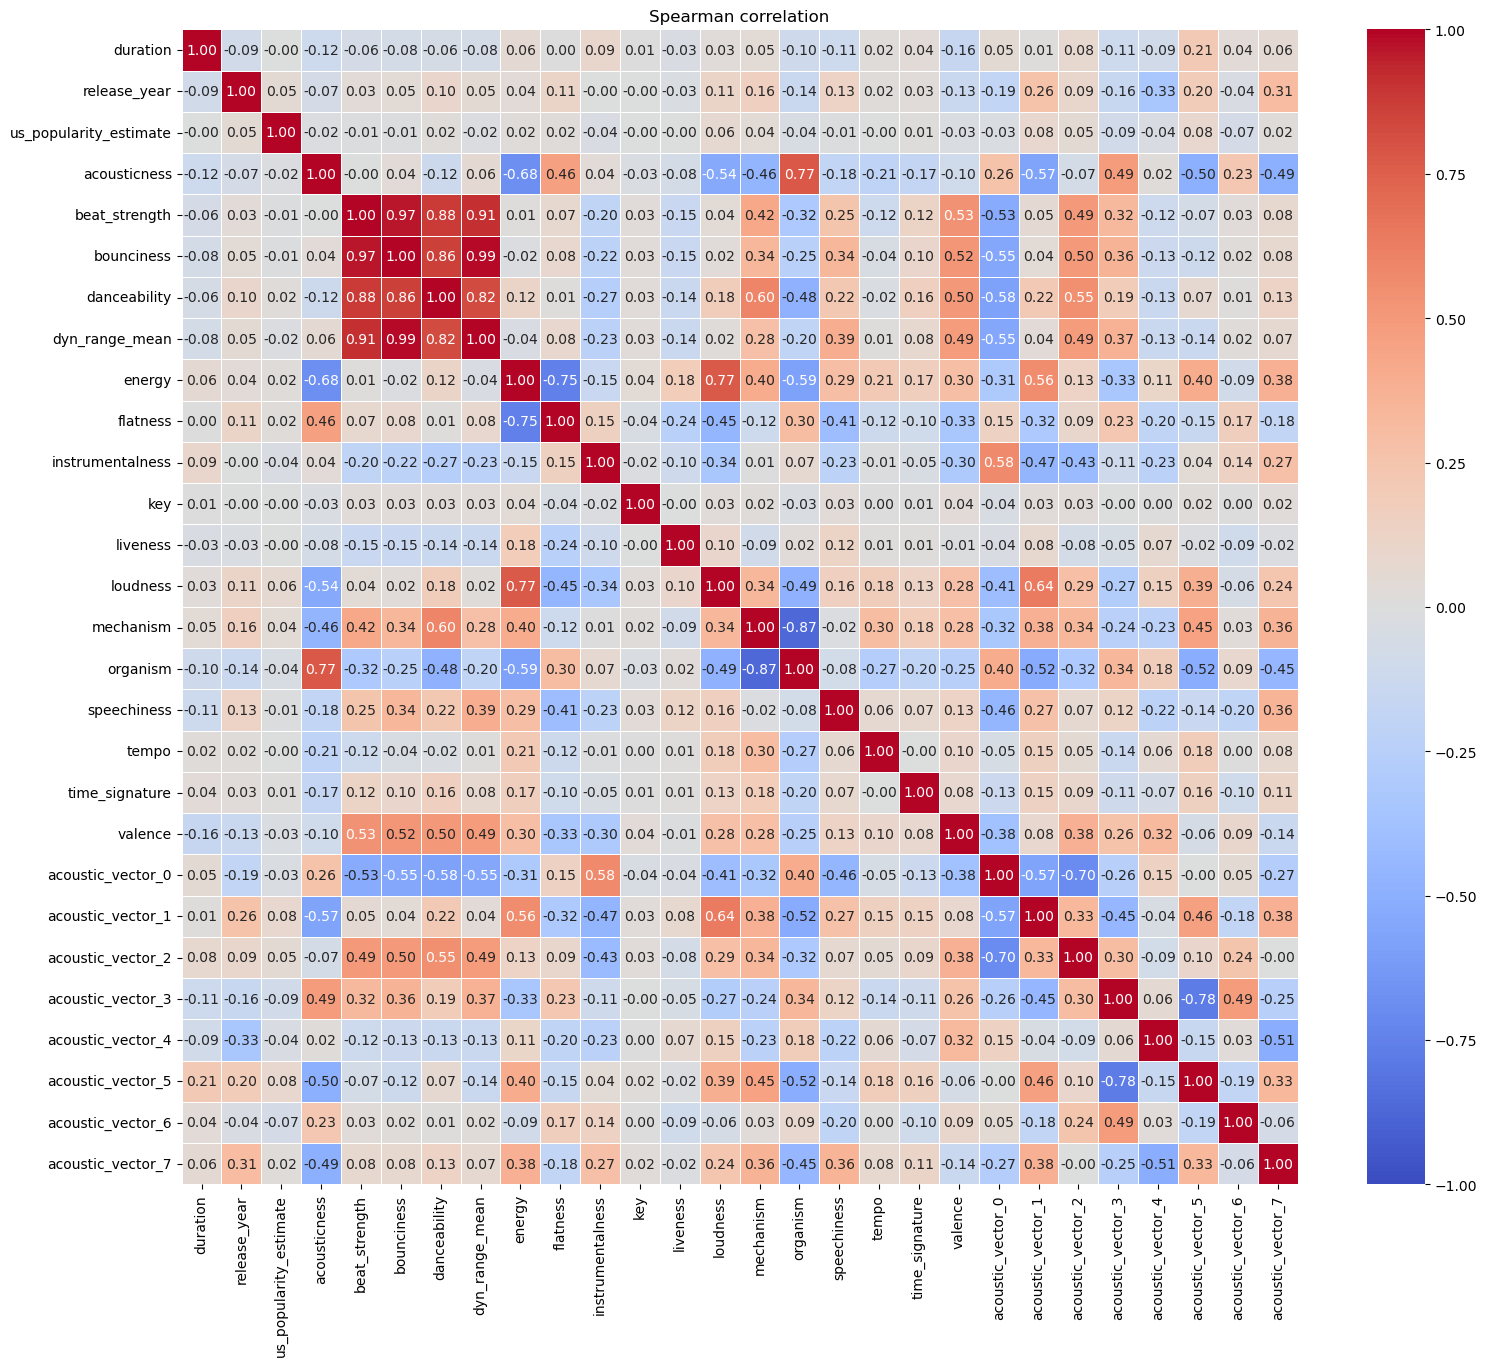

In [13]:
fig, ax = plt.subplots(figsize=(18,15)) 
sns.heatmap( tf_df.corr(method='spearman'), linewidth = 0.5 , cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", ax = ax)
plt.title('Spearman correlation')
plt.show()

In [14]:
log_df_dummy = pd.get_dummies(log_df, columns=['hist_user_behavior_reason_start', 'context_type'])
tf_df_dummy = pd.get_dummies(tf_df, columns=['key','time_signature','mode'])

df_merge = pd.merge(log_df_dummy, tf_df_dummy, how='left', left_on='track_id_clean', right_on = 'track_id')
print(len(df_merge))
df_merge.head()


3122466


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,mode_major,mode_minor
0,64_00015322-1e17-40d9-865d-4887eea2b659,1,19,t_e587194e-c1a1-4177-b089-e4c37dd7a24d,False,False,False,True,0,0,...,0,0,0,0,0,0,1,0,1,0
1,64_00015322-1e17-40d9-865d-4887eea2b659,2,19,t_039553af-ae1b-45ce-9efa-e27ad7db88a6,False,False,True,False,0,0,...,0,0,0,0,0,0,1,0,0,1
2,64_00015322-1e17-40d9-865d-4887eea2b659,3,19,t_fb5ede48-6706-429b-abf8-243559f3f94b,False,False,False,True,0,1,...,0,0,0,0,0,0,1,0,1,0
3,64_00015322-1e17-40d9-865d-4887eea2b659,4,19,t_e6cf4873-d8bb-4894-91cd-1ef4f18f5908,False,False,False,True,0,1,...,0,0,0,0,0,0,1,0,1,0
4,64_00015322-1e17-40d9-865d-4887eea2b659,5,19,t_b74ec0be-4204-43b1-ab03-a42b2744c3ad,True,True,True,False,0,0,...,0,0,1,0,0,0,1,0,0,1


In [15]:
dropping_columns = ['session_length','context_switch','hour_of_day','date','premium','skip_1','skip_2','skip_3','not_skipped']
df_merge_skipT = df_merge[df_merge['skip_2']==True].drop(columns = dropping_columns).groupby('session_id').mean()
df_merge_skipF = df_merge[df_merge['skip_2']==False].drop(columns = dropping_columns).groupby('session_id').mean()
df_merge_skipT.sort_index(inplace = True)
df_merge_skipF.sort_index(inplace = True)

/var/folders/g1/pt2wv7fn1txcdflc2vs67qsr0000gn/T/ipykernel_26967/3617323311.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merge_skipT = df_merge[df_merge['skip_2']==True].drop(columns = dropping_columns).groupby('session_id').mean()
/var/folders/g1/pt2wv7fn1txcdflc2vs67qsr0000gn/T/ipykernel_26967/3617323311.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merge_skipF = df_merge[df_merge['skip_2']==False].drop(columns = dropping_columns).groupby('session_id').mean()


In [16]:
df_merge_skipT.head().T

session_id,64_00015322-1e17-40d9-865d-4887eea2b659,64_00015b21-513c-40e5-989d-2763976d480c,64_0001849a-35e6-404c-bbb4-c6c87a205fd7,64_00029bf8-5e5a-4737-97ec-49331990b8b2,64_0003a7b3-b6f2-4382-8710-3bee8b5642ae
session_position,11.500000,7.166667,14.000000,7.0,9.000
no_pause_before_play,0.928571,0.500000,0.714286,0.6,0.875
short_pause_before_play,0.071429,0.000000,0.000000,0.2,0.125
long_pause_before_play,0.071429,0.333333,0.285714,0.2,0.125
hist_user_behavior_n_seekfwd,0.000000,0.000000,0.142857,0.0,0.000
...,...,...,...,...,...
time_signature_3,0.071429,0.166667,0.142857,0.0,0.125
time_signature_4,0.928571,0.833333,0.857143,1.0,0.875
time_signature_5,0.000000,0.000000,0.000000,0.0,0.000
mode_major,0.571429,0.666667,0.428571,0.6,0.750


In [17]:
df_merge_skipF.head().T

session_id,64_00015322-1e17-40d9-865d-4887eea2b659,64_00015b21-513c-40e5-989d-2763976d480c,64_0001849a-35e6-404c-bbb4-c6c87a205fd7,64_00029bf8-5e5a-4737-97ec-49331990b8b2,64_0003a7b3-b6f2-4382-8710-3bee8b5642ae
session_position,5.8,10.666667,8.615385,7.777778,8.000
no_pause_before_play,0.6,0.583333,0.461538,0.888889,0.625
short_pause_before_play,0.2,0.083333,0.307692,0.111111,0.125
long_pause_before_play,0.2,0.416667,0.461538,0.111111,0.250
hist_user_behavior_n_seekfwd,0.0,0.000000,0.000000,0.111111,0.000
...,...,...,...,...,...
time_signature_3,0.0,0.250000,0.153846,0.000000,0.000
time_signature_4,1.0,0.750000,0.692308,1.000000,1.000
time_signature_5,0.0,0.000000,0.000000,0.000000,0.000
mode_major,0.8,0.416667,0.307692,0.666667,0.125


In [18]:
if len(df_merge_skipT) == len(df_merge_skipF):
    result = stats.ttest_rel(df_merge_skipT,df_merge_skipF)

In [19]:
sorted_tvalues = np.abs(pd.DataFrame(index = df_merge_skipT.columns, data = list(result.statistic))).sort_values(by=0, ascending=False)

sel_range = 30

sorted_tvalues = sorted_tvalues.iloc[:sel_range]


/Users/andrewchang/opt/anaconda3/envs/Springboard_new/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


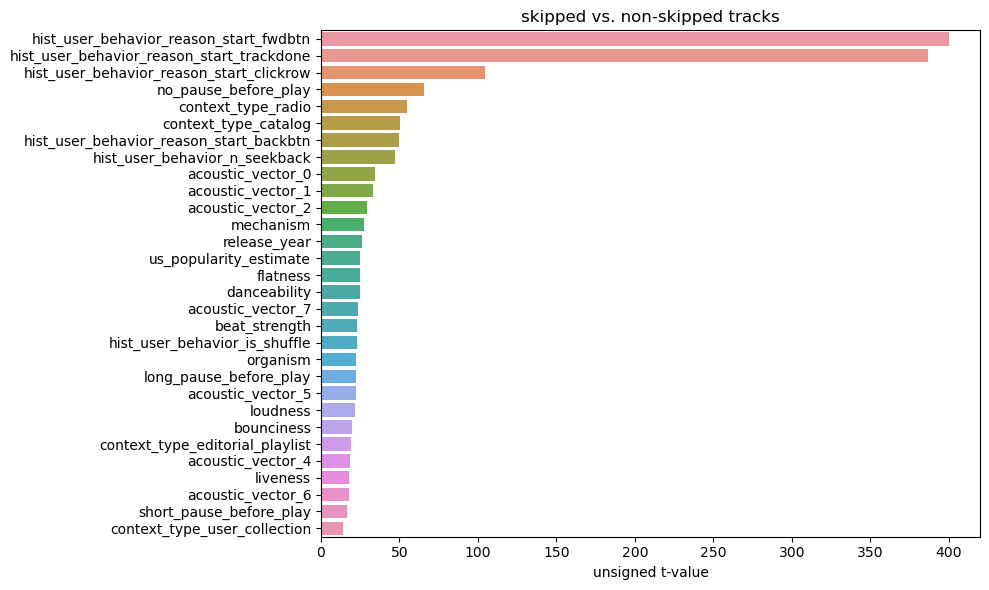

In [20]:
fig, ax = plt.subplots(figsize=(10,6)) 

graph = sns.barplot(data = sorted_tvalues.T, ax=ax, orient = 'h')
ax.set_xlabel('unsigned t-value')
plt.title('skipped vs. non-skipped tracks')
plt.tight_layout()
plt.show()